<a href="https://colab.research.google.com/github/tubameric/DFW-Redcross-Project/blob/main/Redcross_Donor_Prediction_Project_Classification_Model_to_predict_Donor_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing pycaret
!pip install -U --pre pycaret

In [ ]:
# Importing packages and data set
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/tubameric/PortfolioProjects/main/Donor%20Dataset%20-%202023%20-%20Sheet1.csv')

In [ ]:
# Displaying the data columns
data.columns

Index(['DonorUniqueId', 'DonorPostalCode', 'DonorAge', 'MaritalStatus',
       'GenderIdentity', 'IsMemberFlag', 'IsAlumnusFlag', 'IsParentFlag',
       'HasInvolvementFlag', 'WealthRating', 'AcademicDegreeLevel',
       'PreferredAddressType', 'HasEmailFlag', 'ConsecutiveDonorYears',
       'LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
       'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation',
       'CumulativeDonationAmount', 'DonorDateOfBirth', 'DonorIndicatorFlag.'],
      dtype='object')

In [ ]:
data

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,...,1,0,0,0,0,0,0,10,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,0,2100,6-16-1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,...,1,0,0,0,0,0,200,200,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,0,0,3-12-1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0,0,505,11-9-1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0,0,0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,0,0,0,0,0,0,80,9-23-1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0,0,0,3-1-1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,...,1,0,0,0,120,0,0,120,11-5-1972,Y


<Axes: >

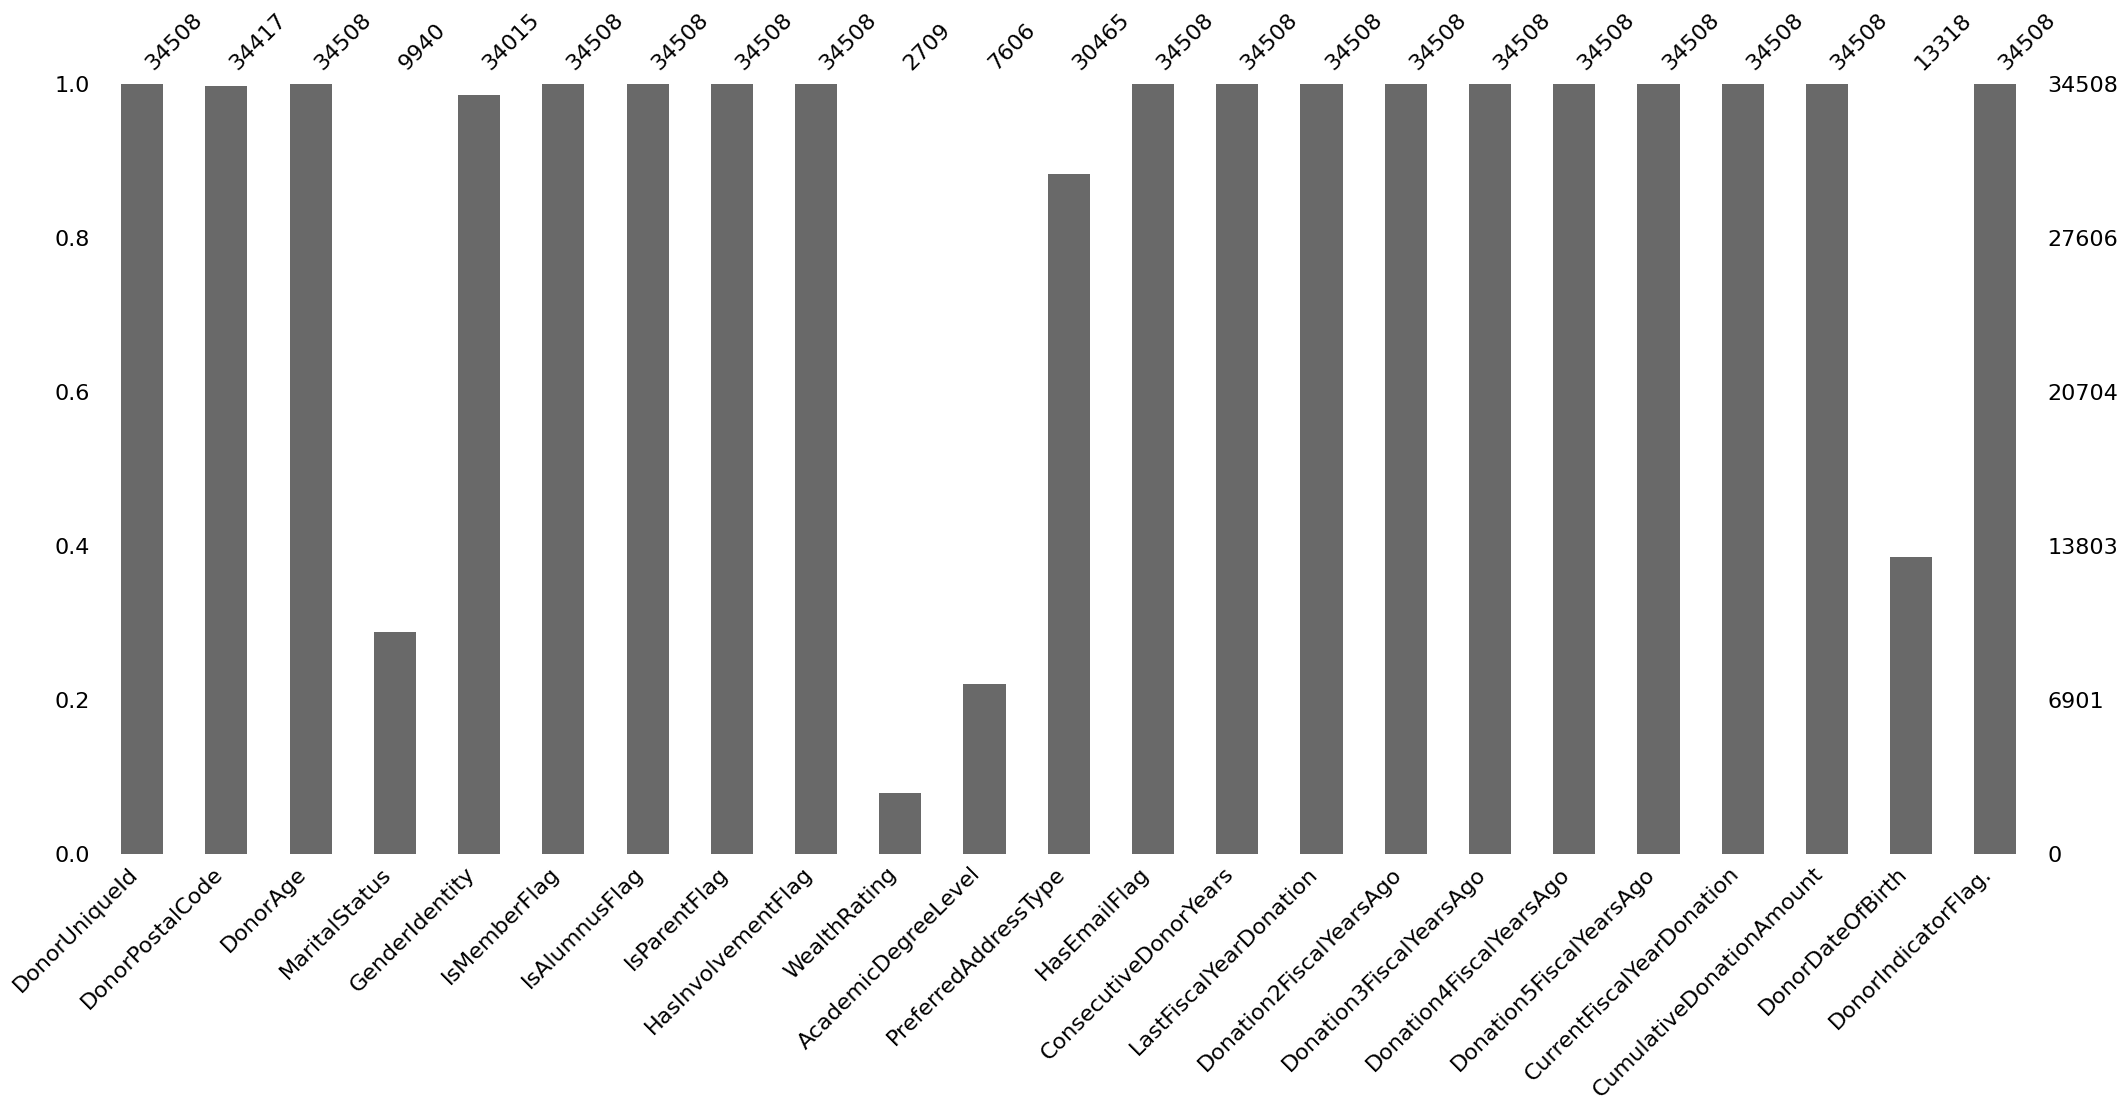

In [ ]:
# Importing missingno package to see the missing data proportion
import missingno as msno
msno.bar(data)

In [ ]:
data['DonorPostalCode']=data[str('DonorPostalCode')]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DonorUniqueId              34508 non-null  int64  
 1   DonorPostalCode            34417 non-null  float64
 2   DonorAge                   34508 non-null  int64  
 3   MaritalStatus              9940 non-null   object 
 4   GenderIdentity             34015 non-null  object 
 5   IsMemberFlag               34508 non-null  object 
 6   IsAlumnusFlag              34508 non-null  object 
 7   IsParentFlag               34508 non-null  object 
 8   HasInvolvementFlag         34508 non-null  object 
 9   WealthRating               2709 non-null   object 
 10  AcademicDegreeLevel        7606 non-null   object 
 11  PreferredAddressType       30465 non-null  object 
 12  HasEmailFlag               34508 non-null  object 
 13  ConsecutiveDonorYears      34508 non-null  int

In [ ]:
# Setting the target variable
y='DonorIndicatorFlag.'

In [ ]:
# Setting the noise/redundant variables & variables with more than 20% missing data
ignored_cols = ['DonorUniqueId',  'MaritalStatus','WealthRating', 'AcademicDegreeLevel','DonorDateOfBirth','CumulativeDonationAmount']

In [ ]:
# Setting the categorical variables
cat_cols = [str('DonorPostalCode'),'GenderIdentity', 'IsMemberFlag', 'IsAlumnusFlag', 'IsParentFlag','HasInvolvementFlag','HasEmailFlag','PreferredAddressType']

In [ ]:
# Setting the numerical variables
num_cols = [ 'DonorAge','ConsecutiveDonorYears','LastFiscalYearDonation','Donation2FiscalYearsAgo', 'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation']

In [ ]:
# Importing pycaret classification libraries
from pycaret.classification import *

In [ ]:
# Configuring the ML experiment using setup function
classif_model  = setup(data,
                      target = y,
                      ignore_features  = ignored_cols,
                      categorical_features = cat_cols,
                      numeric_features= num_cols)

,Description,Value
0,Session id,4849
1,Target,DonorIndicatorFlag.
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(34508, 23)"
5,Transformed data shape,"(34508, 24)"
6,Transformed train set shape,"(24155, 24)"
7,Transformed test set shape,"(10353, 24)"
8,Ignore features,6
9,Numeric features,8


In [ ]:
# Invoking the ML algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6643,0.0000,0.6643,0.6731,0.6669,0.3018,0.3036,1.6970
ada,Ada Boost Classifier,0.6593,0.6777,0.6593,0.7150,0.6625,0.3401,0.3662,1.0670
svm,SVM - Linear Kernel,0.6563,0.7512,0.6563,0.6958,0.6221,0.2534,0.2946,0.8710
knn,K Neighbors Classifier,0.6551,0.0000,0.6551,0.6586,0.6563,0.2737,0.2742,0.7630
gbc,Gradient Boosting Classifier,0.6549,0.6671,0.6549,0.7168,0.6569,0.3342,0.3647,1.8830
lightgbm,Light Gradient Boosting Machine,0.6445,0.0000,0.6445,0.6809,0.6493,0.2956,0.3085,2.3420
xgboost,Extreme Gradient Boosting,0.6442,0.0000,0.6442,0.6816,0.6492,0.2963,0.3096,0.7410
dt,Decision Tree Classifier,0.6411,0.0000,0.6411,0.6619,0.6459,0.2714,0.2765,0.4260
lr,Logistic Regression,0.6388,0.7510,0.6388,0.6173,0.5935,0.1367,0.1598,2.9310
et,Extra Trees Classifier,0.6306,0.0000,0.6306,0.6461,0.6351,0.2426,0.2454,1.9000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4849, verbose=0,
                       warm_start=False)

In [ ]:
# Building the model using the best Algo
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6685,0.0000,0.6685,0.6753,0.6710,0.3083,0.3092
1,0.6560,0.0000,0.6560,0.6716,0.6604,0.2954,0.2987
2,0.6772,0.0000,0.6772,0.6878,0.6806,0.3325,0.3345
3,0.6858,0.0000,0.6858,0.6966,0.6892,0.3510,0.3533
4,0.6610,0.0000,0.6610,0.6750,0.6651,0.3038,0.3067
5,0.6571,0.0000,0.6571,0.6668,0.6605,0.2891,0.2906
6,0.6609,0.0000,0.6609,0.6661,0.6630,0.2896,0.2901
7,0.6671,0.0000,0.6671,0.6779,0.6706,0.3117,0.3137
8,0.6534,0.0000,0.6534,0.6469,0.6490,0.2478,0.2487


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Using the algo to predict donor indicator
predicted_donorindicators = predict_model(model, data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8564,0.9232,0.8564,0.8618,0.8576,0.7012,0.7038


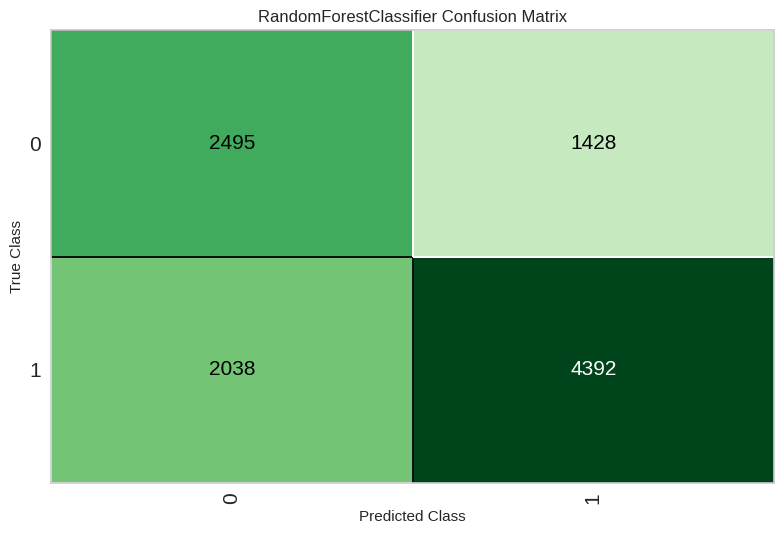

In [ ]:
plot_model(model, plot = 'confusion_matrix')

In [ ]:
# Downloading the predicted bike buyers
predicted_donorindicators.to_csv("DFW Redcross Predicted Donor Indicators.csv")